# Best Response Dynamics

Author: Yuya Furusawa

*Graduate School of Economics, University of Tokyo*

This note demonstrates the best response dynamics model and its related models with `quantecon.game_theory` Python library.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from quantecon.game_theory.brd import BRD, KMR, SamplingBRD

## Model

###  Best response dynamics

Best response dynamics is one of the strategy updating methods.
At each round, the set of players is chosen, and they take best responses given other players' current strategy.
Players who take best response only consider the next round payoff, that is they don't consider the future payoffs.
From this feature, best response dynamics, is called **myopic best response**. 

In the potential game, you can find a Nash equilibrium by best response dynamics.

### KMR model

Kandori-Mailath-Rob model(KMR model) is an evolutional model, similar to best response dynamics model.
In KMR model, agents do not always take a strategy which delivers highest payoff, they sometimes take another strategy.
Unlike best response dynamics, in KMR model, the system is not deterministic evolution.
Startegy flips can occur in every period.

KMR model gives a **[risk-dominance](https://en.wikipedia.org/wiki/Risk_dominance) equilibrium** as stationary equilibrium.
In contrast, best response dynamics does not always give a risk-dominance equilibrium.
(We see these contrast later.)

KMR model is sometimes criticised by the absense of the foundation of strategy flips.
To overcome this point, logit response dynamics model incorporates decision theoretic foundation of strategy chooice (See this note).

### Sampling best response dynamics

Sampling best response dynamics model is also evolutional model.
In this model, agents who get a chance to revise an action observe the randomly sampled opponents' actions, and then take a best resoponse.
If $k$ sample observed, we call **$k$-sampling best response dynamics**.

Under some conditions, this dynamics gives p-dominant equilibrium as stationary equilibirum (To refer the *p-dominant equilibrium*, see Morris, Rob and Shin(1995)).

## `brd.py` usage

In [2]:
# payoff matrix
payoff_matrix = [[4, 0],
                 [3, 2]]
# the number of players
N = 4

To create `BRD` class instance, you need payoff matrix and the integer representing the number of players.

In [3]:
# Best Response Dynamics
brd = BRD(payoff_matrix, N)

You need additionally specify `epsilon`, the probability of strategy flips, and `k`, sample size, to create `KMR` and `SamplingBRD` class instances respectively.
If not provided, these are set to `epsilon=0.1` and `k=2` by default.

In [4]:
# KMR model
epsilon = 0.1
kmr = KMR(payoff_matrix, N, epsilon)

# Sampling Best Response Dynamics
k = 2
sbrd = SamplingBRD(payoff_matrix, N, k)

### `play` method

`play` method proceeds the game by one step.
`play` method requires two arguments: `action` and `action_dist`.

`action_dist` is the current action distribution(in other words "frquency", not probability distribution) where first element indicates the number of players who takes action 0.
`action` is the pure action of a player who taks an action.

In [5]:
# Two players take action 0 and the other two take action 1
# A player who takes action 0 take her best reponse given opponents' actions.
action = 0
action_dist = [2, 2]
brd.play(action, action_dist)

[1, 3]

You can use `play` similarly in KMR model and sampling best response dynamics model.

### `time_series` method

`time_series` method returns a time series of action distributions.
You have to specify the length of time series.
In addition, you can choose initial action distribution from which the dynamics proceeds.
If not specified, it is randomly chosen.

In [6]:
ts_length = 5
init_action_dist = [2, 2]
brd.time_series(ts_length, init_action_dist)

array([[2, 2],
       [3, 1],
       [3, 1],
       [3, 1],
       [3, 1]])

You can use `time_series` similarly KMR model and sampling best response dynamics model.

## Examples

We illustrate the dynamics of players' actions with **coordination game** and **Young's game**.

Coordination game is defined as follows:

1$\backslash$2 | $A$           | $B$ 
 ------------- |---------------| ---------
 $A$           | 2, 2          |   0, 0   
 $B$           | 0, 0          |   1, 1   

In [7]:
coordination_game_matrix = [[2, 0],
                            [0, 1]]

Young's game is defined as follows:

1$\backslash$2 | $A$           | $B$      | $C$
 ------------- |---------------| ---------| --------
 $A$           | 6, 6          |   0, 0   |   0, 0
 $B$           | 5, 5          |   7, 7   |   5, 5
 $C$           | 0, 0          |   5, 5   |   8, 8


In [8]:
young_game_matrix = [[6, 0, 0],
                     [5, 7, 5],
                     [0, 5, 8]]

The number of agents is set to 10 and the length of time series is 200.

In [9]:
N = 10
ts_length = 200

Define the function to plot the graph.

In [10]:
def plot_graph(brd, ts_length, init_action_dist, random_state=None):
    series = brd.time_series(ts_length, init_action_dist=init_action_dist, random_state=random_state)
    action_label = ['A', 'B', 'C']
    fig, ax = plt.subplots(figsize=(8,5))
    for h in range(brd.num_actions):
        ax.plot(series[:, h], linewidth=2, label='action {0}'.format(action_label[h]))
    ax.set_ylim(0, N+1)
    plt.legend(loc=4)
    plt.show()

In the graphs below, vertical axis represents the number of players who take each actions, and holizontal axis represents the periods.

### Best Response Dynamics

In evolutionary game theory, best response dynamics represents a class of strategy updating rules, where each player's strategy in the next round is determined by their best response to subset of population.

#### Coordination Game

In [11]:
brd_coor = BRD(coordination_game_matrix, N=N)

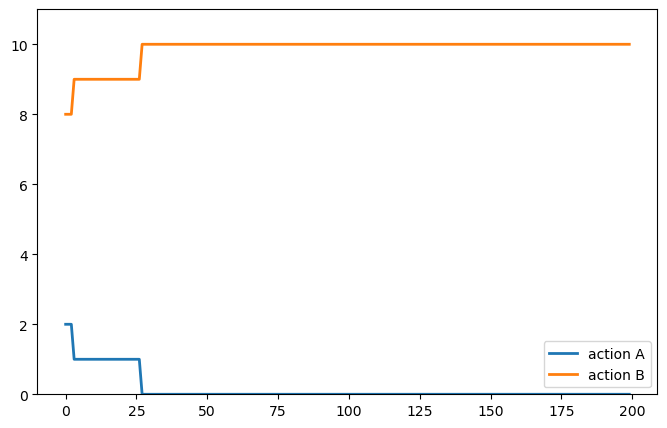

In [12]:
# Only 2 players take action A initially.
m = 2
plot_graph(brd_coor, ts_length, [m, N-m])

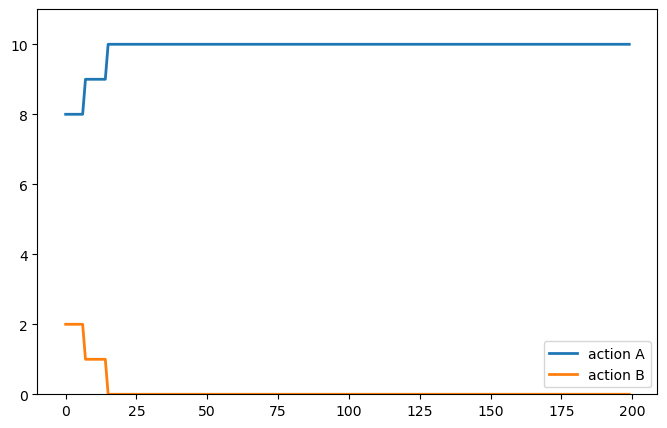

In [13]:
# Eight players take action A initially.
m = 8
plot_graph(brd_coor, ts_length, [m, N-m])

You can see converged action profile depends on the initial action distribution.

### Kandori-Mailath-Rob model (KMR model)

#### Coordination Game

In [14]:
kmr_coor = KMR(coordination_game_matrix, N=N)

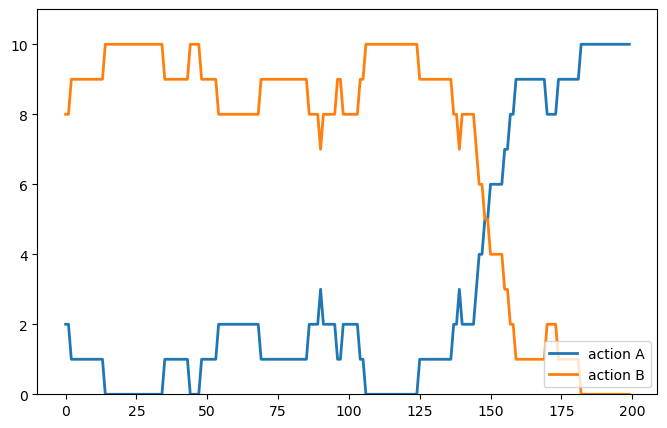

In [15]:
m = 2
plot_graph(kmr_coor, ts_length, [m, N-m])

This graph shows (A,A) is the long-run equilibrium which is a risk-dominance equilibrium (if not, pick larger `ts_length`).

To compare the results from best response dynamics see the above, (A,A) becomes stationary equilibrium even if the number of player who initially takes action A is small. 

#### Young's Game

In [16]:
kmr_young = KMR(young_game_matrix, N=N)

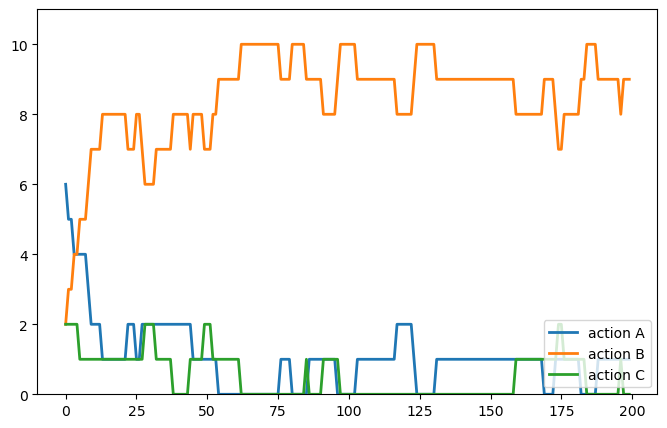

In [17]:
m = 2
plot_graph(kmr_young, ts_length, [N-2*m, m, m])

### Sampling Best Response Dynamics

#### Coordination Game

In [18]:
sbrd_coor = SamplingBRD(coordination_game_matrix, N=N)

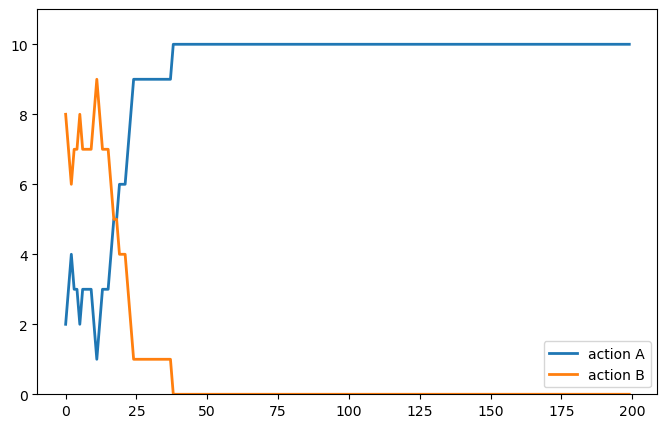

In [19]:
m = 2
plot_graph(sbrd_coor, ts_length, [m, N-m])

You can see (A,A) is the converged action profile, which is the risk-dominance equilibrium.

#### Young's Game

In [20]:
sbrd_young = SamplingBRD(young_game_matrix, N=N)

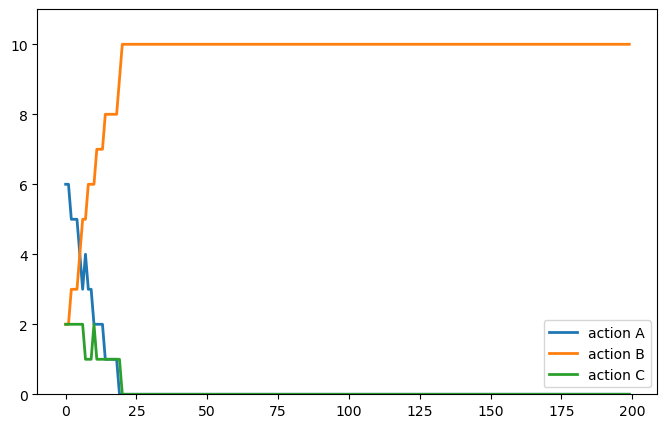

In [21]:
m = 2
plot_graph(sbrd_young, ts_length, [N-2*m, m, m])

---

## Reference

- Kandori, Mailath and Rob(1993), "Learning, Mutation, and Long Run Equilibria in Games.", Econometrica, vol.61, No.1, 26-59
- Morris, Rob, and Shin(1995), "p-Dominance and belief potential", Econometrica 63, 145-157.
- Oyama, Sandholm and Tercieux(2015), "Sampling best response dynamics and deterministic equilibirum selection", Theoretical Economics, 10, 243-281